In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../dataset/full_dataset.csv')
df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [5]:
n_sample = 20000
df_sample = df.sample(n=n_sample,ignore_index=True)
df_sample.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,1057373,Raspberry And White Chocolate Puddings,"[""2 cups self raising flour"", ""1/2 cup sugar"",...","[""Heat oven to 190c."", ""Grease 6 1 cup ramekin...",www.food.com/recipe/raspberry-and-white-chocol...,Gathered,"[""flour"", ""sugar"", ""salt"", ""milk"", ""egg"", ""but..."
1,1369042,Banana Subji,"[""3 Plaintains or semi ripe bananas"", ""2 table...","[""Slice bananas or plaintains in rounds. Leave...",food52.com/recipes/76576-banana-subji,Gathered,"[""Plaintains"", ""Oil"", ""cumin seeds"", ""Asafoeti..."
2,1201603,Pumpkin-Banana Mousse Tart,"[""CRUST"", ""2 cups low-fat graham crackers, cru...","[""To make crust: Preheat oven to 350\u00b0."", ...",www.food.com/recipe/pumpkin-banana-mousse-tart...,Gathered,"[""low-fat"", ""granulated sugar"", ""ground cinnam..."
3,679525,Chicken 'N Rice,"[""4 c. Minute rice"", ""1 can cream of mushroom ...","[""Cook rice as directed."", ""Boil chicken breas...",www.cookbooks.com/Recipe-Details.aspx?id=586821,Gathered,"[""rice"", ""cream of mushroom soup"", ""cream of c..."
4,2144607,Easy Cheese & Bacon Spirals,"[""1 pkg. (11.3 oz.) refrigerated dinner rolls""...","[""Heat oven to 375 degrees F."", ""Separate roll...",www.kraftrecipes.com/recipes/easy-cheese-bacon...,Recipes1M,"[""dinner rolls"", ""Cheddar Cheese Crumbles"", ""B..."


In [6]:
df['clean_text'] = [i.replace('"','').replace('[','').replace(']','').replace(',','') for i in df['directions']]
df_sample['clean_text'] = [i.replace('"','').replace('[','').replace(']','').replace(',','') for i in df_sample['directions']]
df_sample = df_sample.drop(columns='Unnamed: 0')
df_sample.head()

,title,ingredients,directions,link,source,NER,clean_text
0,Raspberry And White Chocolate Puddings,"[""2 cups self raising flour"", ""1/2 cup sugar"",...","[""Heat oven to 190c."", ""Grease 6 1 cup ramekin...",www.food.com/recipe/raspberry-and-white-chocol...,Gathered,"[""flour"", ""sugar"", ""salt"", ""milk"", ""egg"", ""but...",Heat oven to 190c. Grease 6 1 cup ramekins. Si...
1,Banana Subji,"[""3 Plaintains or semi ripe bananas"", ""2 table...","[""Slice bananas or plaintains in rounds. Leave...",food52.com/recipes/76576-banana-subji,Gathered,"[""Plaintains"", ""Oil"", ""cumin seeds"", ""Asafoeti...",Slice bananas or plaintains in rounds. Leave t...
2,Pumpkin-Banana Mousse Tart,"[""CRUST"", ""2 cups low-fat graham crackers, cru...","[""To make crust: Preheat oven to 350\u00b0."", ...",www.food.com/recipe/pumpkin-banana-mousse-tart...,Gathered,"[""low-fat"", ""granulated sugar"", ""ground cinnam...",To make crust: Preheat oven to 350\u00b0. Comb...
3,Chicken 'N Rice,"[""4 c. Minute rice"", ""1 can cream of mushroom ...","[""Cook rice as directed."", ""Boil chicken breas...",www.cookbooks.com/Recipe-Details.aspx?id=586821,Gathered,"[""rice"", ""cream of mushroom soup"", ""cream of c...",Cook rice as directed. Boil chicken breasts; r...
4,Easy Cheese & Bacon Spirals,"[""1 pkg. (11.3 oz.) refrigerated dinner rolls""...","[""Heat oven to 375 degrees F."", ""Separate roll...",www.kraftrecipes.com/recipes/easy-cheese-bacon...,Recipes1M,"[""dinner rolls"", ""Cheddar Cheese Crumbles"", ""B...",Heat oven to 375 degrees F. Separate rolls; pl...


In [ ]:
# data cleaned

In [12]:
from top2vec import Top2Vec

top2vecmodel = Top2Vec(documents=directions_sample, speed="learn", workers=8)

2022-06-20 13:42:51,910 - top2vec - INFO - Pre-processing documents for training
2022-06-20 13:42:53,655 - top2vec - INFO - Creating joint document/word embedding
2022-06-20 13:43:24,667 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-20 13:43:46,111 - top2vec - INFO - Finding dense areas of documents
2022-06-20 13:43:46,544 - top2vec - INFO - Finding topics


In [8]:
directions_list = df['directions'].to_list()

In [11]:
directions_sample = sample(directions_list,10000)

In [98]:
def search_wrapper(keyword_list):
    documents, document_scores, document_ids = top2vecmodel.search_documents_by_keywords(keywords=keyword_list, num_docs=5)
    for doc, score, doc_id in zip(documents, document_scores, document_ids):
        print(titled_df[titled_df["directions"] == doc]["title"])
        print("-----------")
        print(f"Document: {doc_id}, Score: {score}")
        print("-----------")
        print(doc)
        print("-----------")

In [104]:
search_list = input("Please enter your keywords: ")
print("Your keywords are:", search_list)
search_wrapper(list(search_list.split(", ")))

Please enter your keywords: chicken, salad
Your keywords are: chicken, salad
172    Sesame Chicken Salad
Name: title, dtype: object
-----------
Document: 9721, Score: 0.5597761273384094
-----------
["Prepare Sesame Oil Dressing.", "Set aside.", "Toss chicken, onions, celery and romaine in serving bowl.", "Pour dressing over salad; toss.", "Top with noodles, sesame seed and oranges.", "Garnish with romaine, if you wish."]
-----------
5567    Mesclun Salad
Name: title, dtype: object
-----------
Document: 9419, Score: 0.5408029556274414
-----------
["Wash and drain salad leaves.", "Finely slice red capsicum.", "Shaved carrot.", "Chop spring onion.", "Cut tomatoes into wedges.", "Toss all ingredients with the salad leaves in a bowl."]
-----------
4951    Spinach, Lettuce And Bacon Salad(Tired Of Plai...
Name: title, dtype: object
-----------
Document: 4677, Score: 0.5354649424552917
-----------
["Tear spinach and lettuce into bite sized pieces into a large bowl.", "In a skillet, fry the ba

'chicken, salad'

In [101]:
search_wrapper(["beef", "stew"])

6617    Beef Stew With Root Vegetables - Pioneer Woman
Name: title, dtype: object
-----------
Document: 276, Score: 0.6573479175567627
-----------
["Trim any excess fat off the beef and cut into 2\" cubes.", "Heat the oil and butter in a pan. I use a Dutch oven.", "Season beef with salt & pepper. Add beef to hot pan and brown the beef.", "Remove the beef from the pan, (I moved the beef to the outsides of the pan) throw in the garlic and onions and cook until softened, about 3 minutes.", "Pour in the beer, 1/2 of beef broth, (I started with 1/2 the beef broth and added more when necessary, I only used 2 cups total)", "Add Worcestershire sauce, tomato paste, sugar, paprika.", "Return the beef to the pan, cover and simmer on a low heat until the meat is very tender, 1 1/2 to 2 hours. *This may take longer depending on how large your beef chunks are.", "If the liquid level gets too low, add more broth as needed.", "About 30-45 minutes before the beef is tender, add the carrots, potatoes, p

In [10]:
from random import sample

In [97]:
documents, document_scores, document_ids = top2vecmodel.search_documents_by_keywords(keywords=["salad", "chicken"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(titled_df[titled_df["directions"] == doc]["title"])
    print("-----------")
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")

172    Sesame Chicken Salad
Name: title, dtype: object
-----------
Document: 9721, Score: 0.5597761273384094
-----------
["Prepare Sesame Oil Dressing.", "Set aside.", "Toss chicken, onions, celery and romaine in serving bowl.", "Pour dressing over salad; toss.", "Top with noodles, sesame seed and oranges.", "Garnish with romaine, if you wish."]
-----------
5567    Mesclun Salad
Name: title, dtype: object
-----------
Document: 9419, Score: 0.5408029556274414
-----------
["Wash and drain salad leaves.", "Finely slice red capsicum.", "Shaved carrot.", "Chop spring onion.", "Cut tomatoes into wedges.", "Toss all ingredients with the salad leaves in a bowl."]
-----------
4951    Spinach, Lettuce And Bacon Salad(Tired Of Plai...
Name: title, dtype: object
-----------
Document: 4677, Score: 0.5354649424552917
-----------
["Tear spinach and lettuce into bite sized pieces into a large bowl.", "In a skillet, fry the bacon until crisp, then drain the fat.", "Combine with spinach and lettuce.", "

In [96]:
titled_df

,Unnamed: 0,title,ingredients,directions,link,source,NER,clean_text
0,140,Blackberry Pie,"[""3/4 c. sugar"", ""2 1/2 Tbsp. cornstarch"", ""1 ...","[""Combine sugar, cornstarch and water in a hea...",www.cookbooks.com/Recipe-Details.aspx?id=215390,Gathered,"[""sugar"", ""cornstarch"", ""water"", ""flavored gel...",Combine sugar cornstarch and water in a heavy ...
1,183,Hungarian-Stuffed Peppers,"[""4 large peppers"", ""1 large can V-8"", ""1 onio...","[""Prepare peppers (remove white sections)."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=1051266,Gathered,"[""peppers"", ""onion"", ""garlic powder"", ""ground ...",Prepare peppers (remove white sections). Mix g...
2,380,Lemon Crunch,"[""1 stick butter"", ""1 c. flour"", ""1/2 c. pecan...","[""Preheat oven to 350\u00b0.""]",www.cookbooks.com/Recipe-Details.aspx?id=1001355,Gathered,"[""butter"", ""flour"", ""pecans"", ""cream cheese"", ...",Preheat oven to 350\u00b0.
3,713,Old Fashion Punch,"[""2 Tbsp. sugar"", ""2 Tbsp. bitters"", ""2 1/2 c....","[""Just before serving, add ice ring and 2 quar...",www.cookbooks.com/Recipe-Details.aspx?id=202126,Gathered,"[""sugar"", ""bitters"", ""whiskey"", ""water""]",Just before serving add ice ring and 2 quarts ...
4,738,Salad Luncheon Beans,"[""1/2 to 1 lb. ground beef"", ""1 medium onion, ...","[""Do not drain any beans; mix together."", ""Bro...",www.cookbooks.com/Recipe-Details.aspx?id=774813,Gathered,"[""ground beef"", ""onion"", ""beans"", ""butter bean...",Do not drain any beans; mix together. Brown be...
...,...,...,...,...,...,...,...,...
11844,2230444,Sweet Potato Fries Ww 2pts,"[""12 ounces sweet potatoes"", ""2 packets splend...","[""Cut sweet potatoes in wedge style strips."", ...",www.food.com/recipe/sweet-potato-fries-ww-2pts...,Recipes1M,"[""sweet potatoes"", ""packets splenda sugar"", ""b...",Cut sweet potatoes in wedge style strips. Spra...
11845,2230659,Coconut Bread,"[""200 grams Bread (strong) flour"", ""50 grams C...","[""Roast the walnuts and chop finely."", ""Yeast ...",cookpad.com/us/recipes/146209-coconut-bread,Recipes1M,"[""Bread"", ""flour"", ""Coconut milk"", ""Sugar"", ""b...",Roast the walnuts and chop finely. Yeast Versi...
11846,2230822,Chilled Tomato Shrimp Soup for One,"[""1 cup tomato juice"", ""12 cup cook baby shrim...","[""Combine ingredients and chill.""]",www.food.com/recipe/chilled-tomato-shrimp-soup...,Recipes1M,"[""tomato juice"", ""cook baby shrimp"", ""lemon ju...",Combine ingredients and chill.
11847,2230949,Kuku-Ye Gerdu (Leek Omelette),"[""500 g leeks, thoroughly washed, halved and s...","[""Heat some oil and cook the leek on middle he...",www.food.com/recipe/kuku-ye-gerdu-leek-omelett...,Recipes1M,"[""walnuts"", ""eggs"", ""salt"", ""black pepper"", ""t...",Heat some oil and cook the leek on middle heat...


KeyError: 'title'

In [65]:
titled_df = df[pd.DataFrame(df['directions'].tolist()).isin(directions_sample).any(1).values].reset_index().drop(['index'], axis=1)

In [90]:
titled_df

,Unnamed: 0,title,ingredients,directions,link,source,NER,clean_text
0,140,Blackberry Pie,"[""3/4 c. sugar"", ""2 1/2 Tbsp. cornstarch"", ""1 ...","[""Combine sugar, cornstarch and water in a hea...",www.cookbooks.com/Recipe-Details.aspx?id=215390,Gathered,"[""sugar"", ""cornstarch"", ""water"", ""flavored gel...",Combine sugar cornstarch and water in a heavy ...
1,183,Hungarian-Stuffed Peppers,"[""4 large peppers"", ""1 large can V-8"", ""1 onio...","[""Prepare peppers (remove white sections)."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=1051266,Gathered,"[""peppers"", ""onion"", ""garlic powder"", ""ground ...",Prepare peppers (remove white sections). Mix g...
2,380,Lemon Crunch,"[""1 stick butter"", ""1 c. flour"", ""1/2 c. pecan...","[""Preheat oven to 350\u00b0.""]",www.cookbooks.com/Recipe-Details.aspx?id=1001355,Gathered,"[""butter"", ""flour"", ""pecans"", ""cream cheese"", ...",Preheat oven to 350\u00b0.
3,713,Old Fashion Punch,"[""2 Tbsp. sugar"", ""2 Tbsp. bitters"", ""2 1/2 c....","[""Just before serving, add ice ring and 2 quar...",www.cookbooks.com/Recipe-Details.aspx?id=202126,Gathered,"[""sugar"", ""bitters"", ""whiskey"", ""water""]",Just before serving add ice ring and 2 quarts ...
4,738,Salad Luncheon Beans,"[""1/2 to 1 lb. ground beef"", ""1 medium onion, ...","[""Do not drain any beans; mix together."", ""Bro...",www.cookbooks.com/Recipe-Details.aspx?id=774813,Gathered,"[""ground beef"", ""onion"", ""beans"", ""butter bean...",Do not drain any beans; mix together. Brown be...
...,...,...,...,...,...,...,...,...
11844,2230444,Sweet Potato Fries Ww 2pts,"[""12 ounces sweet potatoes"", ""2 packets splend...","[""Cut sweet potatoes in wedge style strips."", ...",www.food.com/recipe/sweet-potato-fries-ww-2pts...,Recipes1M,"[""sweet potatoes"", ""packets splenda sugar"", ""b...",Cut sweet potatoes in wedge style strips. Spra...
11845,2230659,Coconut Bread,"[""200 grams Bread (strong) flour"", ""50 grams C...","[""Roast the walnuts and chop finely."", ""Yeast ...",cookpad.com/us/recipes/146209-coconut-bread,Recipes1M,"[""Bread"", ""flour"", ""Coconut milk"", ""Sugar"", ""b...",Roast the walnuts and chop finely. Yeast Versi...
11846,2230822,Chilled Tomato Shrimp Soup for One,"[""1 cup tomato juice"", ""12 cup cook baby shrim...","[""Combine ingredients and chill.""]",www.food.com/recipe/chilled-tomato-shrimp-soup...,Recipes1M,"[""tomato juice"", ""cook baby shrimp"", ""lemon ju...",Combine ingredients and chill.
11847,2230949,Kuku-Ye Gerdu (Leek Omelette),"[""500 g leeks, thoroughly washed, halved and s...","[""Heat some oil and cook the leek on middle he...",www.food.com/recipe/kuku-ye-gerdu-leek-omelett...,Recipes1M,"[""walnuts"", ""eggs"", ""salt"", ""black pepper"", ""t...",Heat some oil and cook the leek on middle heat...


In [13]:
topic_sizes, topic_nums = top2vecmodel.get_topic_sizes()

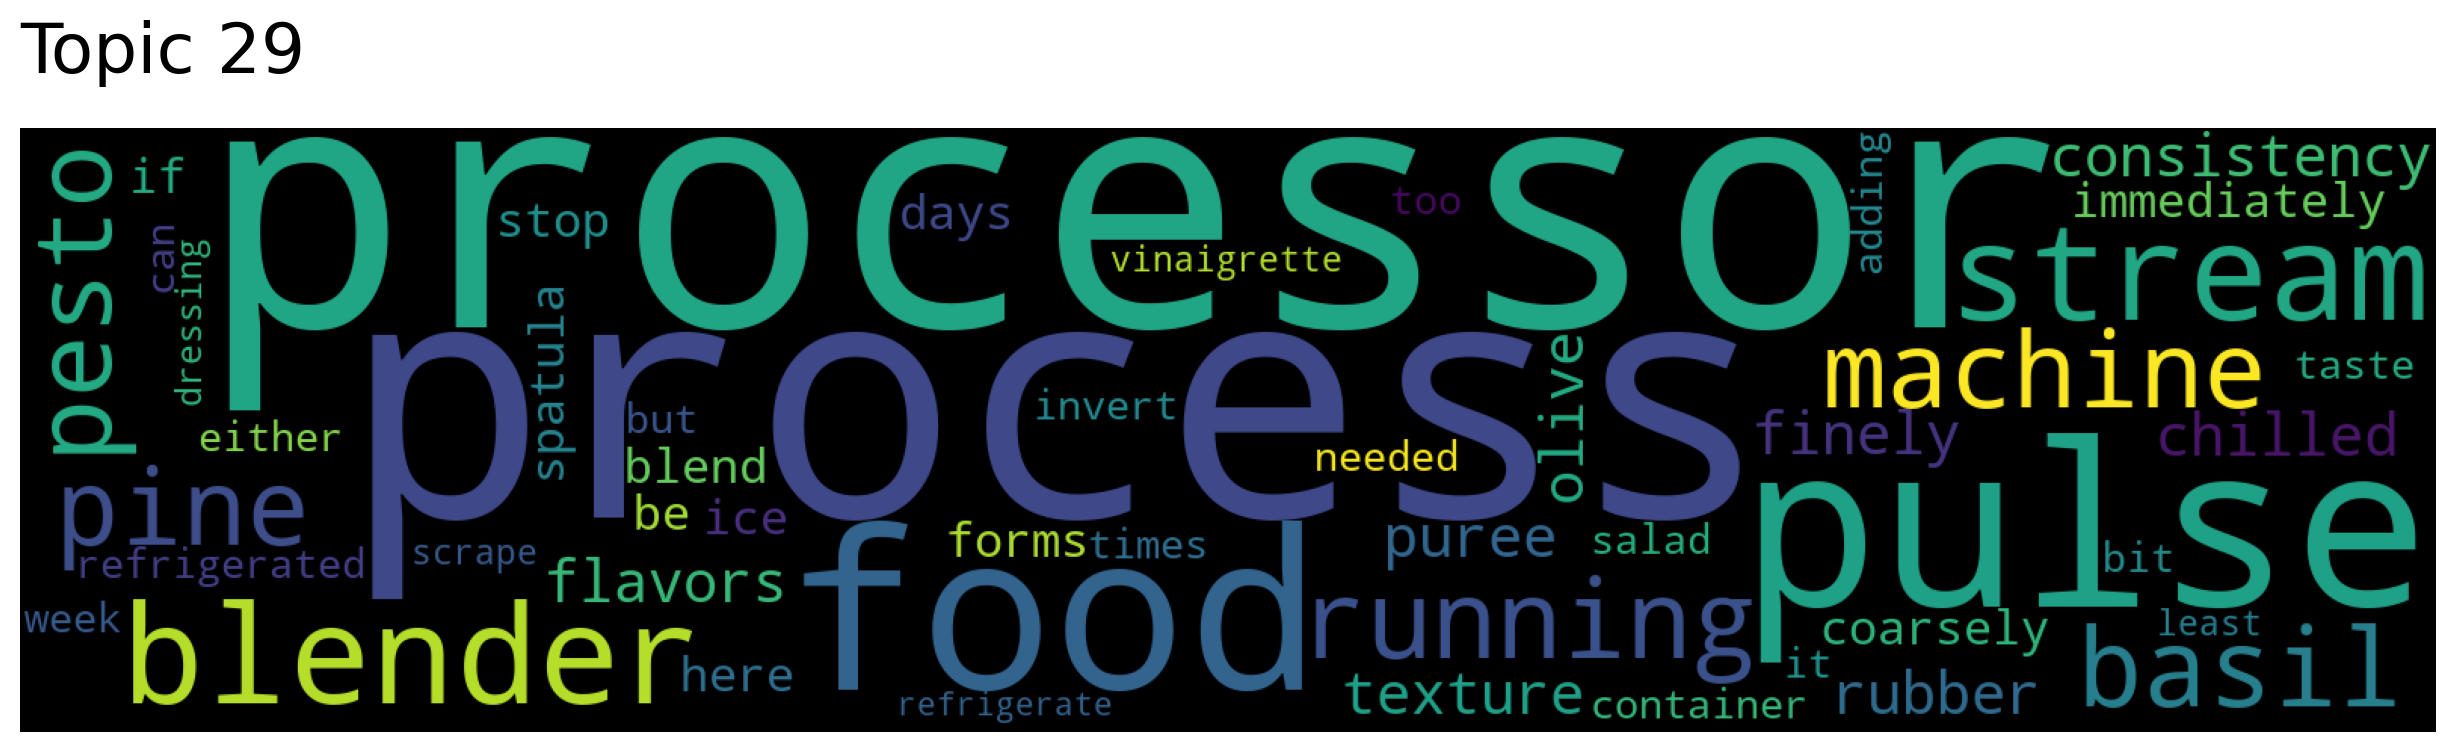

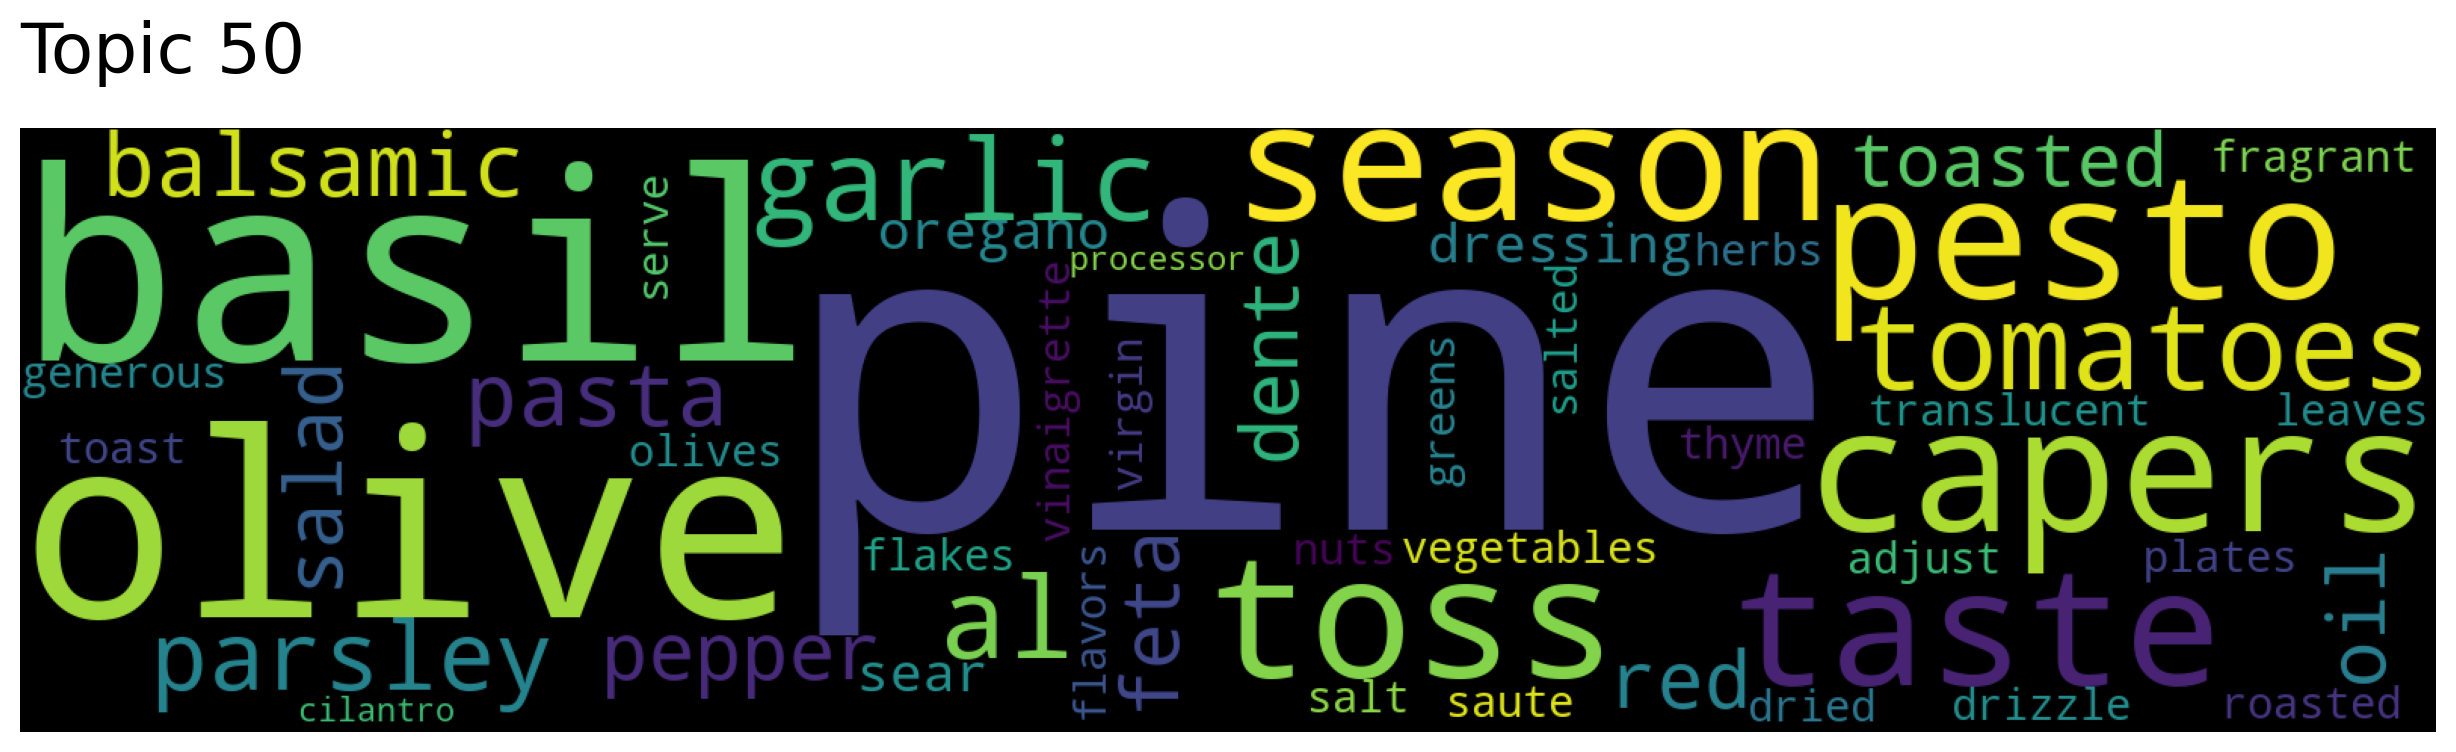

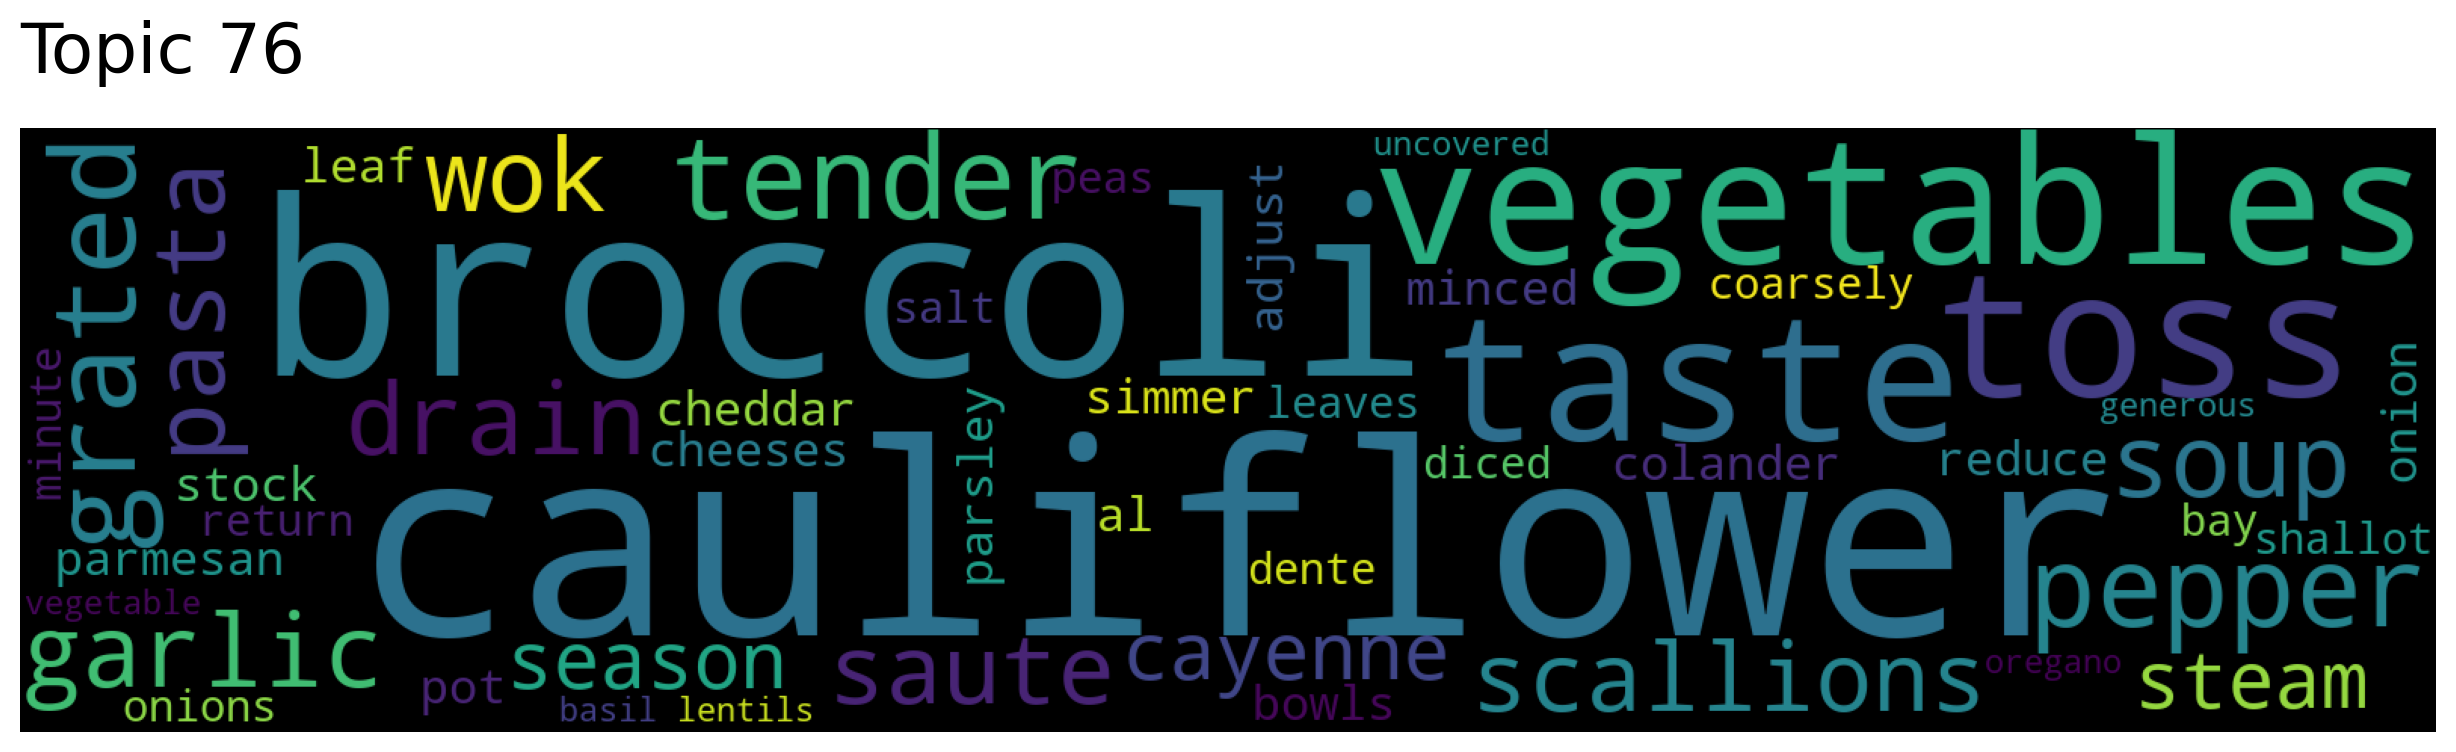

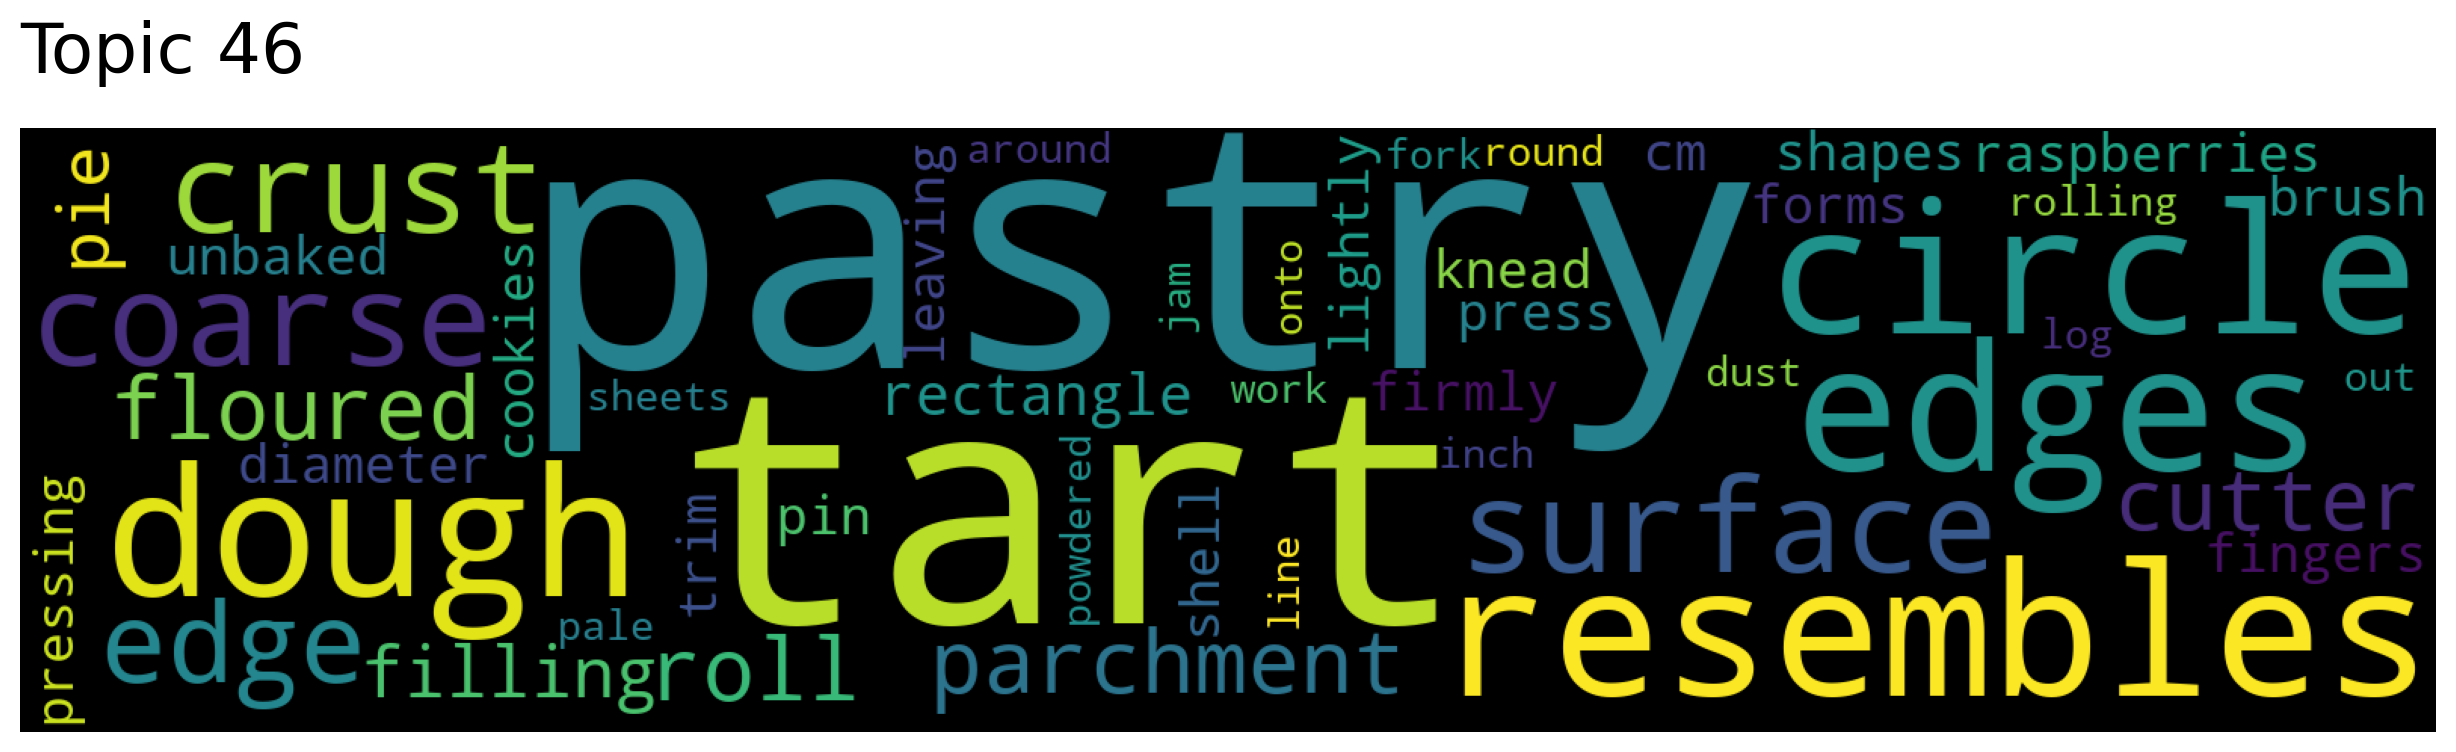

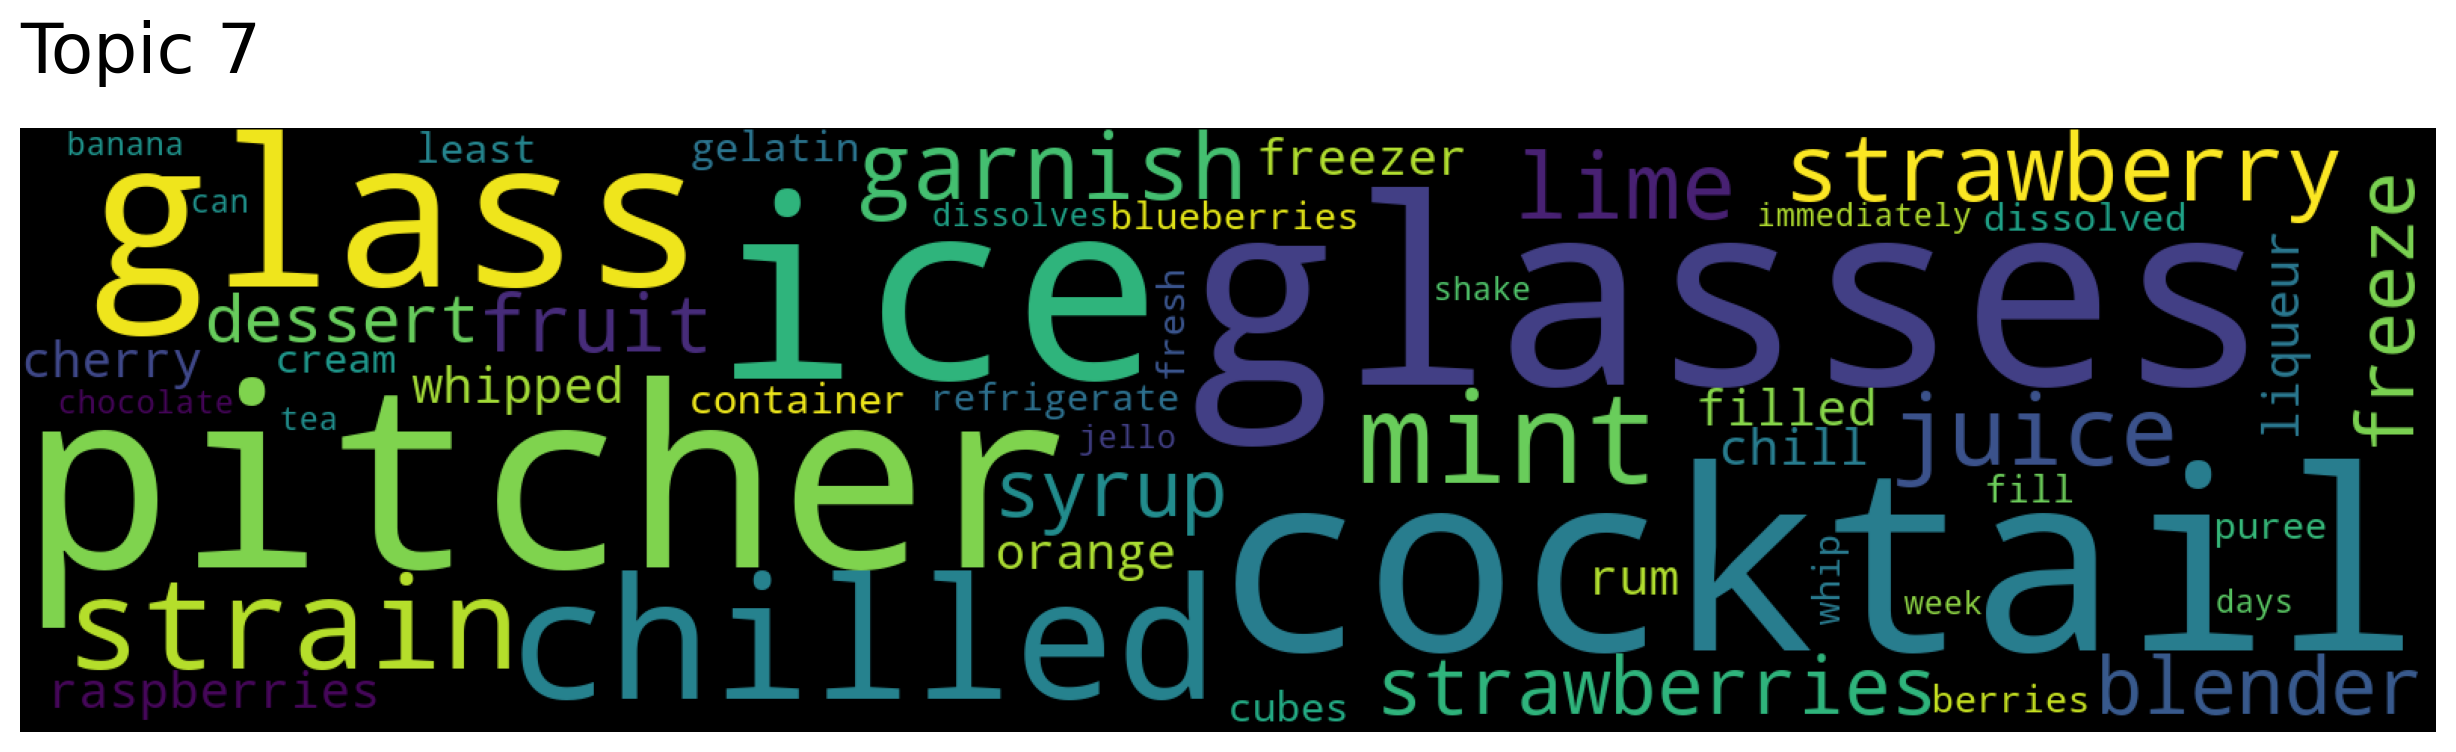

In [14]:
topic_words, word_scores, topic_scores, topic_nums = top2vecmodel.search_topics(keywords=["food"], num_topics=5)
for topic in topic_nums:
    top2vecmodel.generate_topic_wordcloud(topic)

In [15]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import SentenceTransformer, util
import torch

In [29]:
## Calculate sentence embeddings
model = SentenceTransformer('all-MiniLM-L12-v2')
corpus = NER_sample
sentence_embeddings = model.encode(corpus, convert_to_tensor=True)

In [17]:
NER_list = df['NER'].to_list()


0          ["brown sugar", "milk", "vanilla", "nuts", "bu...
1          ["beef", "chicken breasts", "cream of mushroom...
2          ["frozen corn", "cream cheese", "butter", "gar...
3          ["chicken", "chicken gravy", "cream of mushroo...
4          ["peanut butter", "graham cracker crumbs", "bu...
                                 ...                        
2231137    ["chocolate hazelnut spread", "tortillas", "bu...
2231138    ["eggs", "paprika", "salt", "choice", "miracle...
2231139    ["radish", "Sesame oil", "White sesame seeds",...
2231140    ["apple cider", "sugar", "kosher salt", "bay l...
2231141    ["ground veal", "sausage", "bread crumbs", "mi...
Name: NER, Length: 2231142, dtype: object

In [18]:
NER_sample = sample(NER_list,10000)

In [20]:
NER_sample

['["cheese", "eggs", "white bread", "kashkaval", "Sunflower oil"]',
 '["canned great Northern beans", "Cream Cheese", "Mayonnaise", "mustard", "green onions", "Italian parsley", "lemon zest"]',
 '["sunflower oil", "lemon juice", "garlic", "starchy potato", "salt", "chicken", "Olive oil", "Salt", "thyme"]',
 '["cream of chicken soup", "milk", "chicken", "Enchilada sauce", "green chillies"]',
 '["head cauliflower", "Cheddar", "Spanish olive oil", "Italian bread crumbs", "salt"]',
 '["chicken breasts", "eggs", "stuffing", "butter", "fresh mushrooms", "chicken broth", "Muenster"]',
 '["Blackberries", "Apples", "flour", "Almond powder", "handful", "Sugar", "Butter", "Eggs", "Baking powder", "flour", "Butter", "Sugar", "Cinnamon powder"]',
 '["eggs", "cheese", "milk", "bread", "salt", "onion", "dry mustard", "bacon"]',
 '["pork tenderloin", "red bell pepper", "onion", "grape tomatoes", "red peppers", "thyme", "garlic", "ginger", "onion salt", "ground pepper", "ground ginger", "cumin"]',
 '["

In [49]:
titled_df = df[pd.DataFrame(df['directions'].tolist()).isin(directions_sample).any(1).values].reset_index().drop(['index'], axis=1)

In [41]:
titled_df

,Unnamed: 0,title,ingredients,directions,link,source,NER,clean_text
0,35,Artichoke Dip,"[""2 cans or jars artichoke hearts"", ""1 c. mayo...","[""Drain artichokes and chop."", ""Mix with mayon...",www.cookbooks.com/Recipe-Details.aspx?id=263108,Gathered,"[""hearts"", ""mayonnaise"", ""Parmesan cheese""]",Drain artichokes and chop. Mix with mayonnaise...
1,75,Sausage Balls,"[""2 c. Bisquick"", ""1 lb. sausage"", ""8 oz. pkg....","[""Mix sausage and cheese together."", ""Add Bisq...",www.cookbooks.com/Recipe-Details.aspx?id=586592,Gathered,"[""Bisquick"", ""sausage"", ""Cheddar cheese""]",Mix sausage and cheese together. Add Bisquick ...
2,98,Crazy Peanut Butter Cookies,"[""1 c. creamy peanut butter"", ""1 c. sugar"", ""1...","[""Mix together and roll into balls; flatten wi...",www.cookbooks.com/Recipe-Details.aspx?id=892363,Gathered,"[""peanut butter"", ""sugar"", ""egg""]",Mix together and roll into balls; flatten with...
3,264,Cherry Pie,"[""9-inch graham cracker crust"", ""1 can condens...","[""Cream cheese should be close to room tempera...",www.cookbooks.com/Recipe-Details.aspx?id=185919,Gathered,"[""graham cracker crust"", ""condensed milk"", ""le...",Cream cheese should be close to room temperatu...
4,286,Fruit Pizza,"[""1 tube refrigerator enriched sugar cookie do...","[""Press out cookie dough flat on a 13-inch piz...",www.cookbooks.com/Recipe-Details.aspx?id=319278,Gathered,"[""cream cheese"", ""fresh fruits"", ""powdered sug...",Press out cookie dough flat on a 13-inch pizza...
...,...,...,...,...,...,...,...,...
14177,2230260,Beer Marinated Steaks With Peppercorn Sauce Re...,"[""6 x top loin (New York strip) steaks (12 oun...","[""* Note: A blend of black, white, pink and gr...",cookeatshare.com/recipes/beer-marinated-steaks...,Recipes1M,"[""loin"", ""dark brown sugar"", ""lime juice"", ""re...",* Note: A blend of black white pink and green ...
14178,2230352,Chocolate Chip Pancakes,"[""2 eggs"", ""1 1/4 cup milk"", ""4 tbsp butter (m...","[""in a bowl mix all the dry ingredients"", ""in ...",cookpad.com/us/recipes/357212-chocolate-chip-p...,Recipes1M,"[""eggs"", ""milk"", ""butter"", ""salt"", ""flour"", ""b...",in a bowl mix all the dry ingredients in a sep...
14179,2230709,Hand-Torn Pasta with Pickled Tomatoes and Herbs,"[""3/4 cup unseasoned rice vinegar"", ""1 tablesp...","[""make the pickled tomatoes In a medium saucep...",www.foodandwine.com/recipes/hand-torn-pasta-pi...,Recipes1M,"[""rice vinegar"", ""tamari"", ""fish sauce"", ""fres...",make the pickled tomatoes In a medium saucepan...
14180,2230856,Mustard Onion Sandwich Buns,"[""3 12 cups all-purpose flour"", ""2 cups white ...","[""Note: 2 packages of yeast can be used instea...",www.food.com/recipe/mustard-onion-sandwich-bun...,Recipes1M,"[""flour"", ""whole wheat flour"", ""yeast"", ""onion...",Note: 2 packages of yeast can be used instead ...


In [45]:
## Recommendation
# Query sentences:
queries = ['pasta, basil, olive oil, cheese, tomato, mushroom, milk', 
           'cacao, flour, sugar, egg, baking, soda', 
           'chuck, roast, potato, mushroom, rice']
# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = model.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    cos_scores = util.cos_sim(query_embedding, sentence_embeddings)[0]
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], titled_df[titled_df['NER'] == corpus[idx]]['title'], "(Score: {:.4f})".format(score))





Query: pasta, basil, olive oil, cheese, tomato, mushroom, milk

Top 5 most similar sentences in corpus:
["pasta", "olive oil", "onion", "garlic", "tomatoes", "basil", "salt", "butter", "flour", "milk", "bay leaf", "nutmeg", "mozzarella ball", "cheese"] 8302    Neapolitan Baked Ziti
Name: title, dtype: object (Score: 0.8559)
["olive oil", "onion", "red", "zucchini", "eggplant", "mushrooms", "Italian-style tomatoes", "tomato paste", "water", "salt", "flour", "milk", "mozzarella", "lasagna noodles", "grated cheese"] 7689    Vegetable Lasagna (Low Fat)
Name: title, dtype: object (Score: 0.8432)
["pasta", "olive oil", "garlic", "onion", "shrimp", "tomatoes", "water", "white wine", "fresh basil", "salt", "parmesan cheese"] 14019    Shrimp Pasta
Name: title, dtype: object (Score: 0.8424)
["tomatoes", "green onion", "basil", "garlic", "salt", "olive oil", "Romano cheese", "bread"] 6324    Italian Bruschetta
Name: title, dtype: object (Score: 0.8357)
["pasta", "cheese", "onion", "White wine

In [23]:
corpus

['["cheese", "eggs", "white bread", "kashkaval", "Sunflower oil"]',
 '["canned great Northern beans", "Cream Cheese", "Mayonnaise", "mustard", "green onions", "Italian parsley", "lemon zest"]',
 '["sunflower oil", "lemon juice", "garlic", "starchy potato", "salt", "chicken", "Olive oil", "Salt", "thyme"]',
 '["cream of chicken soup", "milk", "chicken", "Enchilada sauce", "green chillies"]',
 '["head cauliflower", "Cheddar", "Spanish olive oil", "Italian bread crumbs", "salt"]',
 '["chicken breasts", "eggs", "stuffing", "butter", "fresh mushrooms", "chicken broth", "Muenster"]',
 '["Blackberries", "Apples", "flour", "Almond powder", "handful", "Sugar", "Butter", "Eggs", "Baking powder", "flour", "Butter", "Sugar", "Cinnamon powder"]',
 '["eggs", "cheese", "milk", "bread", "salt", "onion", "dry mustard", "bacon"]',
 '["pork tenderloin", "red bell pepper", "onion", "grape tomatoes", "red peppers", "thyme", "garlic", "ginger", "onion salt", "ground pepper", "ground ginger", "cumin"]',
 '["